# Chapter 3: Working with# Chapter 3: Working with Quadratic Unconstrained Binary Optimization Problems Quadratic Unconstrained Binary Optimization Problems

In [28]:
from qiskit import *
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.opflow.primitive_ops import PauliOp
from qiskit_optimization import QuadraticProgram
from qiskit.opflow import I, Z
import numpy as np

##   Moving from Ising to QUBO and back

Suposed we have the problem

\begin{equation}
    Minimize \ \ \ \ x_0^2 + 2x_0x_1 - 3
\end{equation}

In Ising formulation

\begin{equation}
    Minimize \ \ \ \ \frac{z_0z_1}{2} - z_0 -\frac{z_1}{2} -2
\end{equation}


Notice that we can simply drop the independent term -2.

Let's compute

In [29]:
H = 0.5*(Z^Z) - (I^Z) -0.5*(Z^I)
H

PauliSumOp(SparsePauliOp(['ZZ', 'IZ', 'ZI'],
              coeffs=[ 0.5+0.j, -1. +0.j, -0.5+0.j]), coeff=1.0)

In [30]:
# Número de qubits
num_qubits = 2
expected_value = []
binary_str = []

for i in range(2**num_qubits):
    #Decimal to Binary
    binary_str.append(bin(i)[2:].zfill(num_qubits))  
    state = Statevector.from_int(i, dims = 2**num_qubits)
    #Computing the expected value using the formal definition
    expected_value.append(state.inner(state.evolve(H)))
    print("The expected value of state |{}> is".format(binary_str[i]), (expected_value[i]).real)
    
#Posições com o menor valor
max_cut = np.where(expected_value == np.min(expected_value))[0]

for i in range(len(max_cut)):
    print(' \n Therefore, the optimal cut is |{}>'.format(binary_str[max_cut[i]]))

The expected value of state |00> is -1.0
The expected value of state |01> is 0.0
The expected value of state |10> is -1.0
The expected value of state |11> is 2.0
 
 Therefore, the optimal cut is |00>
 
 Therefore, the optimal cut is |10>


Therefore, $x_0 = x_1 = 0$ or $x_0 = 0, x_1 = 1$. Notice that the minimum expected value is -1 for Ising model; if we add the independent term -2, it will be -3, witch is the value that minimized the QUBO.

However, we can solve these problems directly from QUBO to Ising:

In [31]:
qubo = QuadraticProgram()
qubo.binary_var('x')
qubo.binary_var('y')

#Defining QUBO
qubo.minimize(quadratic={('x', 'x'):1, ('x', 'y'):2})
print(qubo.prettyprint())

Problem name: 

Minimize
  x^2 + 2*x*y

Subject to
  No constraints

  Binary variables (2)
    x y



In [32]:
#QUBO to Ising
op, offset = qubo.to_ising()
print('offset: {}'.format(offset))
print('operator:')
print(op)

offset: 1.0
operator:
SparsePauliOp(['IZ', 'ZZ', 'ZI'],
              coeffs=[-1. +0.j,  0.5+0.j, -0.5+0.j])


But notice qiskit defines the Hamiltonian such that the last bit is the most significant, while the first is the least significant. In this logic, the qubis are $\vert z_1 z_0 \rangle$ and the Hamiltonian is $-IZ + 0.5 ZZ - 0.5 ZI$.

In [33]:
# Número de qubits
num_qubits = 2
expected_value = []
binary_str = []

for i in range(2**num_qubits):
    #Decimal to Binary
    binary_str.append(bin(i)[2:].zfill(num_qubits))  
    state = Statevector.from_int(i, dims = 2**num_qubits)
    #Computing the expected value using the formal definition
    expected_value.append(state.inner(state.evolve(op)))
    print("The expected value of state |{}> is".format(binary_str[i]), (expected_value[i]).real)
    
#Posições com o menor valor
max_cut = np.where(expected_value == np.min(expected_value))[0]

for i in range(len(max_cut)):
    print(' \n Therefore, the optimal solution is |{}>'.format(binary_str[max_cut[i]]))

The expected value of state |00> is -1.0
The expected value of state |01> is 0.0
The expected value of state |10> is -1.0
The expected value of state |11> is 2.0
 
 Therefore, the optimal solution is |00>
 
 Therefore, the optimal solution is |10>


Therefore, $x_0 = x_1 = 0$ or $x_0 = 0, x_1 = 1$. 
(Remember the order difined by qiskit)

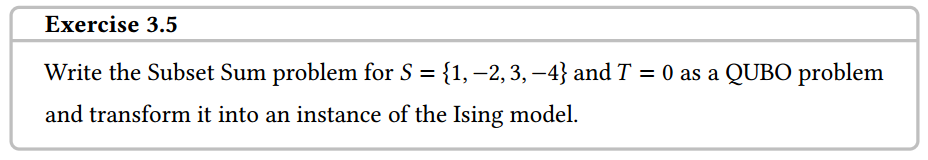

The QUBO model is defined as 

\begin{equation}
    Minimize \ \ \ \ (x_0 - 2x_1 + 3x_2 -4x_3)^2
\end{equation}

And we have

\begin{equation}
    Minimize \ \ \ \ x_0^2 - 4x_0x_1 + 6x_0x_2 - 8x_0x_3 + 4x_1^2 - 12x_1x_2 + 16x_1x_3 + 9x_2^2 - 24x_2x_3 +16x_3^2
\end{equation}

Let's solve it using qiskit.

In [34]:
qubo = QuadraticProgram()
qubo.binary_var('x_0')
qubo.binary_var('x_1')
qubo.binary_var('x_2')
qubo.binary_var('x_3')

<Variable: x_3 (binary)>

In [35]:
#Defining QUBO
qubo.minimize(quadratic={('x_0', 'x_0'):1, ('x_0', 'x_1'):-4, ('x_0', 'x_2'):6, 
                        ('x_0', 'x_3'):-8, ('x_1', 'x_1'):4, ('x_1', 'x_2'):-12,
                        ('x_1', 'x_3'):16, ('x_2', 'x_2'):9, ('x_2', 'x_3'):-24,
                        ('x_3', 'x_3'):16})
print(qubo.prettyprint())

Problem name: 

Minimize
  x_0^2 - 4*x_0*x_1 + 6*x_0*x_2 - 8*x_0*x_3 + 4*x_1^2 - 12*x_1*x_2 + 16*x_1*x_3
  + 9*x_2^2 - 24*x_2*x_3 + 16*x_3^2

Subject to
  No constraints

  Binary variables (4)
    x_0 x_1 x_2 x_3



In [36]:
#QUBO to Ising
op, offset = qubo.to_ising()
print('offset: {}'.format(offset))
print('operator:')
print(op)

offset: 8.5
operator:
SparsePauliOp(['IIIZ', 'IIZZ', 'IIZI', 'IZIZ', 'IZII', 'IZZI', 'ZIIZ', 'ZIII', 'ZIZI', 'ZZII'],
              coeffs=[ 1. +0.j, -1. +0.j, -2. +0.j,  1.5+0.j,  3. +0.j, -3. +0.j, -2. +0.j,
 -4. +0.j,  4. +0.j, -6. +0.j])


In [37]:
# Número de qubits
num_qubits = 4
expected_value = []
binary_str = []

for i in range(2**num_qubits):
    #Decimal to Binary
    binary_str.append(bin(i)[2:].zfill(num_qubits))  
    state = Statevector.from_int(i, dims = 2**num_qubits)
    #Computing the expected value using the formal definition
    expected_value.append(state.inner(state.evolve(op)))
    print("The expected value of state {} is".format(binary_str[i]), (expected_value[i]).real)
    
#Posições com o menor valor
max_cut = np.where(expected_value == np.min(expected_value))[0]

for i in range(len(max_cut)):
    print(' \n Therefore, the solution solution is |{}>'.format(binary_str[max_cut[i]]))

The expected value of state 0000 is -8.5
The expected value of state 0001 is -7.5
The expected value of state 0010 is -4.5
The expected value of state 0011 is -7.5
The expected value of state 0100 is 0.5
The expected value of state 0101 is 7.5
The expected value of state 0110 is -7.5
The expected value of state 0111 is -4.5
The expected value of state 1000 is 7.5
The expected value of state 1001 is 0.5
The expected value of state 1010 is 27.5
The expected value of state 1011 is 16.5
The expected value of state 1100 is -7.5
The expected value of state 1101 is -8.5
The expected value of state 1110 is 0.5
The expected value of state 1111 is -4.5
 
 Therefore, the solution solution is |0000>
 
 Therefore, the solution solution is |1101>


Therefore, the optimal solution is $x_0 = x_2 = x_3=1$, $x_1 = 0$. And the trivial solution $x_0 = x_1 =x_2 = x_3=0$.